## Test of the Kan score predictor

In [1]:
import torch
from score_predicter import ScoreCombiner

torch.set_default_dtype(torch.float64)
# create random dummy data

random_input = torch.rand(320, 5)

random_test = torch.rand(40, 5)
random_score_test = torch.randint(1, 6, (40, 1)).float()
random_score = torch.randint(1, 6, (320, 1)).float()
dataset = {
    'train_input': random_input,
    'test_input' : random_test,
    'train_label': random_score,
    'test_label': random_score_test
}
predictor = ScoreCombiner(42)


In [2]:
print(dataset['train_label'])

tensor([[5.],
        [4.],
        [5.],
        [1.],
        [2.],
        [4.],
        [3.],
        [3.],
        [5.],
        [5.],
        [2.],
        [4.],
        [1.],
        [4.],
        [2.],
        [1.],
        [5.],
        [3.],
        [5.],
        [3.],
        [1.],
        [4.],
        [4.],
        [1.],
        [3.],
        [1.],
        [4.],
        [4.],
        [4.],
        [2.],
        [3.],
        [1.],
        [2.],
        [5.],
        [5.],
        [4.],
        [3.],
        [5.],
        [4.],
        [1.],
        [4.],
        [4.],
        [1.],
        [2.],
        [3.],
        [2.],
        [5.],
        [5.],
        [3.],
        [4.],
        [3.],
        [2.],
        [2.],
        [2.],
        [2.],
        [4.],
        [5.],
        [4.],
        [4.],
        [3.],
        [5.],
        [5.],
        [2.],
        [4.],
        [3.],
        [1.],
        [5.],
        [5.],
        [4.],
        [1.],
        [5.],
      

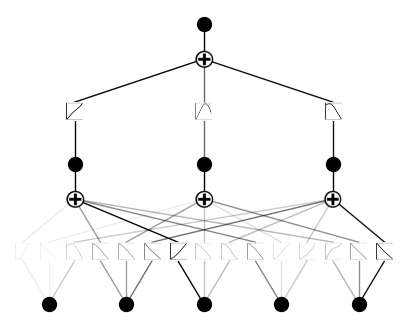

In [3]:
predictor(random_input)
predictor.plot()
    

In [4]:
predictor.scoring_function.fit(dataset, opt="LBFGS", steps=50, lamb=0.001)

train loss: 9.89e-01 | test loss: 1.85e+00 | reg: 1.92e+01 : 100%|██| 50/50 [00:13<00:00,  3.79it/s]


{'train_loss': [array(1.26068542),
  array(1.12941217),
  array(1.07857016),
  array(1.04407647),
  array(1.02700023),
  array(1.1370216),
  array(1.11967711),
  array(1.10359077),
  array(1.09214106),
  array(1.08467743),
  array(1.07953144),
  array(1.07297606),
  array(1.06328897),
  array(1.04696408),
  array(1.03849468),
  array(1.03553995),
  array(1.03033725),
  array(1.02699306),
  array(1.02323998),
  array(1.02053513),
  array(1.01958963),
  array(1.0183098),
  array(1.0167178),
  array(1.01280806),
  array(1.00869721),
  array(1.00690358),
  array(1.00310167),
  array(1.00026409),
  array(0.99906616),
  array(0.99847775),
  array(1.00026057),
  array(0.99942349),
  array(0.99884746),
  array(0.99828487),
  array(0.99755971),
  array(0.99674208),
  array(0.99611753),
  array(0.99543386),
  array(0.99466552),
  array(0.99427752),
  array(0.99409529),
  array(0.99347892),
  array(0.99261328),
  array(0.99154821),
  array(0.99016512),
  array(0.98993491),
  array(0.98970862),
  

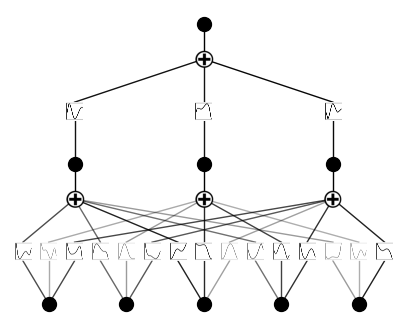

In [5]:
predictor.scoring_function.plot()

MultKAN(
  (act_fun): ModuleList(
    (0-1): 2 x KANLayer(
      (base_fun): SiLU()
    )
  )
  (base_fun): SiLU()
  (symbolic_fun): ModuleList(
    (0-1): 2 x Symbolic_KANLayer()
  )
)


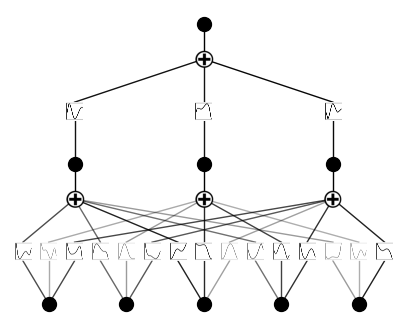

In [6]:
predictor.scoring_function = predictor.scoring_function.prune()
print(predictor.scoring_function)
predictor.scoring_function.plot()

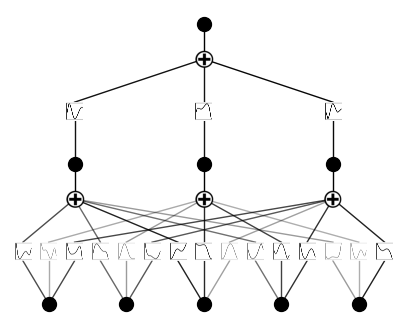

In [7]:
predictor.scoring_function.plot()